<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/5_decision_trees_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Decision Trees - Intro and Regression

Decision Trees are supervised machine learning algorithms that are used for both regression and classification tasks. Trees are powerful algorithms that can handle complex datasets. 

Here are 7 interesting facts about decision trees:

* They do not need the numerical input data to be scaled. Whatever the numerical values are, decision trees don't care. 

* Decision trees handle categorical features in the raw text format (Scikit-Learn doesn't support this, TensorFlow's trees implementation does).

* Different to other complex learning algorithms, the results of decision trees can be interpreted. It's fair to say that decision trees are not blackbox type models. 
* While most models will suffer from missing values, decision trees are okay with them.
* Trees can handle imbalanced datasets. You will only have to adjust the weights of the classes.
* Trees can provide the feature importances or how much each feature contributed to the model training results.
* Trees are the basic building blocks of ensemble methods such as random forests and gradient boosting machines.

The way decision trees works is like the series of if/else questions. Let's say that you want to make a decision of the car to buy. In order to get the right car to buy, you could go on and evaluate the level of the safety, the number of sits and doors by asking series of if like questions. 

Here is the structure of the decision trees.

![Decision Trees.png](https://cdn.hashnode.com/res/hashnode/image/upload/v1632212349927/4XijLSXib.png)


A well-known downside of decision trees is that they tend to overfit the data easily(pretty much assumed they will always overfit at first). One way to overcome overfitting is to reduce the maximum depth of the decision tree (refered to as `max_depth`hyperparameter) in decision trees. We will see other techniques to avoid overfitting. 

To motivate the superpower of decision trees, let's use it for a regression task where instead of predicting class, we are predicting a continous value. In the next lab, we will use them for classification. 

## Decision Trees for Regression

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Decision Trees](#5)
* [6 - Evaluating Decision Trees](#6)
* [7 - Improving Decision Trees](#7)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In this regression task with decision trees, we will use the Machine CPU (Central Processing Unit) data which is avilable at [OpenML](https://www.openml.org/t/5492). We will load it with Sklearn `fetch_openml` function. 

If you are reading this, it's very likely that you know CPU or you have once(or many times) thought about it when you were buying your computer. In this notebook, we will predict the relative performance of the CPU given the following data: 

* MYCT: machine cycle time in nanoseconds (integer)
* MMIN: minimum main memory in kilobytes (integer)
* MMAX: maximum main memory in kilobytes (integer)
* CACH: cache memory in kilobytes (integer)
* CHMIN: minimum channels in units (integer)
* CHMAX: maximum channels in units (integer)
* PRP: published relative performance (integer) (target variable)

In [2]:
# Let's hide warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

machine_cpu = fetch_openml(name='machine_cpu')

In [4]:
type(machine_cpu)

sklearn.utils.Bunch

In [5]:
machine_cpu.data.shape

(209, 6)

In [6]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [7]:
# Displaying feature names

machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [8]:
# Getting the whole dataframe

machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125.0,256.0,6000.0,256.0,16.0,128.0,198.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0
...,...,...,...,...,...,...,...
204,124.0,1000.0,8000.0,0.0,1.0,8.0,42.0
205,98.0,1000.0,8000.0,32.0,2.0,8.0,46.0
206,125.0,2000.0,8000.0,0.0,2.0,14.0,52.0
207,480.0,512.0,8000.0,32.0,0.0,0.0,67.0


Now, let's get the data and labels. 

In [9]:
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

In [10]:
type(machine_data)

pandas.core.frame.DataFrame

In [11]:
type(machine_labels)

pandas.core.series.Series

<a name='3'></a>
## 3 - Exploratory Analysis


Before doing exploratory analysis, let's get the training and test data. 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(machine_data,machine_labels, test_size=0.2,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(X_train), len(X_test)))

The size of training data is: 167 
The size of testing data is: 42


Let's visualize the histograms of all numeric features. 

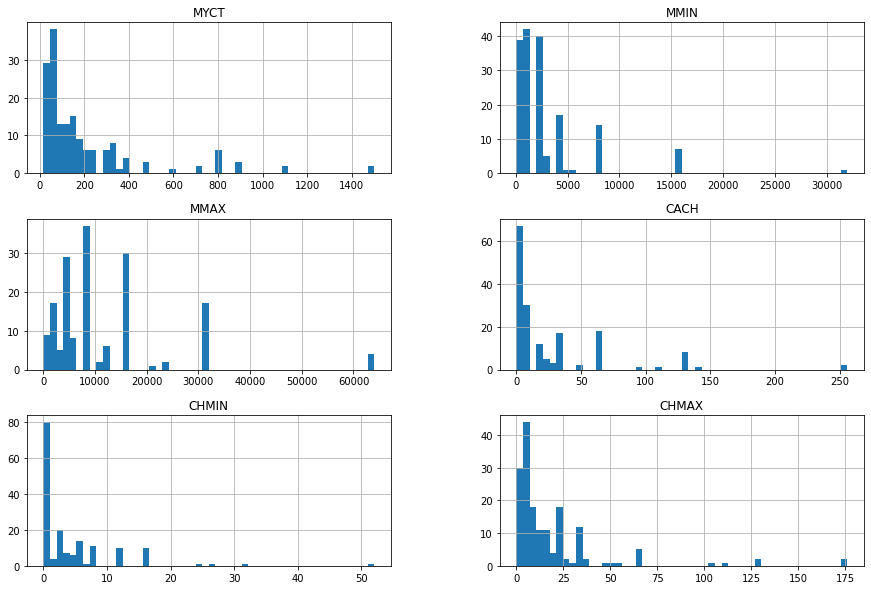

In [13]:
X_train.hist(bins=50, figsize=(15,10))
plt.show()

Or we can quickly use `sns.pairplot()` to look into the data. 

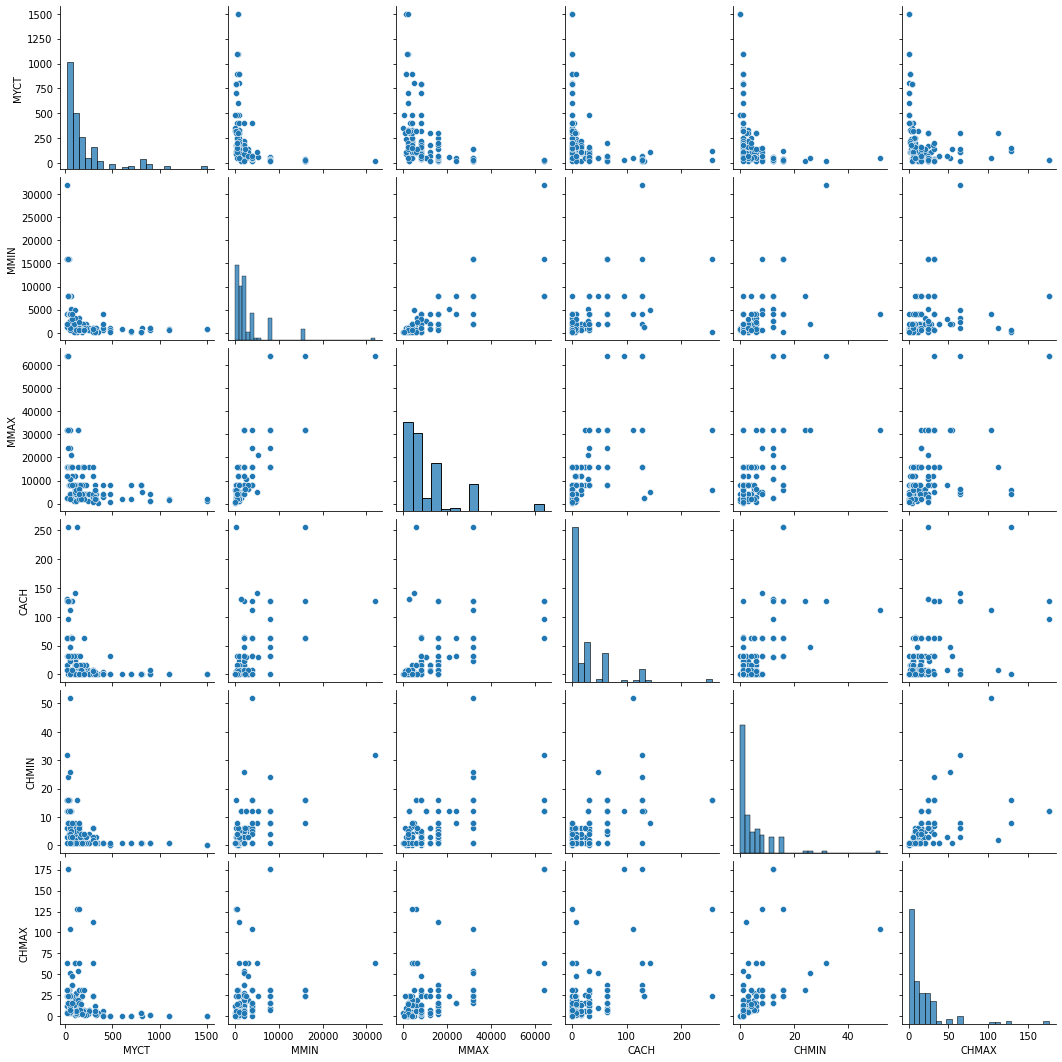

In [14]:
sns.pairplot(X_train)

In [15]:
# Checking summary stats

X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.958084,2900.826347,11761.161677,26.071856,4.760479,18.616766
std,266.772823,4165.950964,12108.332354,42.410014,6.487439,27.489919
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,232.500000,3100.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [16]:
# Checking missing values

X_train.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

We don't have any missing values. 

<a name='4'></a>

## 4 - Data Preprocessing 

It is here that we prepare the data to be in the proper format for the machine learning model. 

Decision trees don't care if the features are scaled or not. Let's set up a pipeline to scale features, and we will use it to verify that notion. 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())
    
])

X_train_scaled = scale_pipe.fit_transform(X_train)

<a name='5'></a>

## 5 - Training Decision Tree Regressor


In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Let's train the same model on the scaled data. 

In [19]:
tree_reg_scaled = DecisionTreeRegressor()

tree_reg_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

<a name='6'></a>

## 6 - Evaluating Decision Trees

Let's first check the root mean squarred errr on the training. It is not advised to evaluate the model on the test data since we haven't improved it yet. I will make a function to make it easier and to avoid repetitions. 

In [45]:
from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
    """
    Take the input data, model and labels and return predictions
    
    """
    
    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    rmse = np.sqrt(mse)
    rmse
    
    return rmse

In [46]:
predict(X_train, tree_reg, y_train)

9.724590719956222

And when the training data is scaled...

In [47]:
predict(X_train_scaled, tree_reg_scaled, y_train)

9.724590719956222

As you can see, there is no difference at all. So in your future projects using decision trees, whether you scale the data or not, your predictions will not be affected. 

But don't do this....

In [48]:
predict(X_train_scaled, tree_reg, y_train)

201.29511805033474

If you can inspect the parameters that I passed in predict function above, there are scaled data, model trained on unscaled data, and labels(y_train). As you may have guessed, that is a complete mismatch which led to poor results. If you trained a model on scaled data, the data that you predict the model on should be scaled in the same way too. 

Let's try to improve the model.

<a name='7'></a>

## 7 - Improving Decision Trees

In [49]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

We have seen that one way to improve the decision tree model is to find the right number of max_depth and some other few parameters. Let's use GridSearch to find best hyperparameters. Note that this may end up overfitting because we have a small dataset. But since we are doing this for learning purpose (you can adapt it to your problem), let's do it. 

In [50]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 'min_samples_split': [0,1,2, 3, 4], 
              'max_depth':[None,0,1,2,3]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 0, 1, 2, 3],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [51]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_split': 4}

In [52]:
grid_search.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=4, random_state=42)

In [53]:
tree_best = grid_search.best_estimator_

Let's make prediction on the training data again

In [54]:
predict(X_train, tree_best, y_train)

34.999530266023044

Like we said, we overfitted. The RMSE on our small dataset was pretty enough (and you probably would not use decision trees for small data like this we are using). 

Finally we can evaluate the model on the test set. Let's use the orginal model. 

In [55]:
predict(X_test, tree_reg, y_test)

42.89411103991738

Clearly, the model overfitted and the improvements we tried didn't improve anything. This is not an issue of the model or our approach to improve the model. Decision trees are complex models for the data we have. 

This is the end of the notebook. We have learned the fundamental idea behind the decision trees, and used it to predict the CPU performance. In the next lab, we will use it for classification task and we will use a real world dataset so that we can practically improve the decision trees model. 

[Back to top](#0)